In [ ]:
%cd ../

In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/21/2020 18:29:53 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 18:30:03 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 18:30:13 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 18:30:22 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/21/2020 18:30:32 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

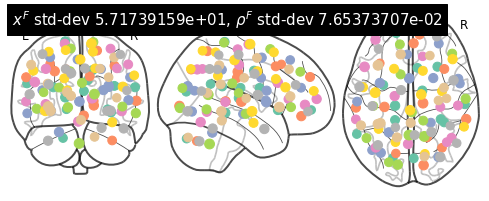

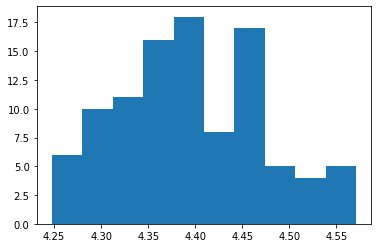

(<nilearn.plotting.displays.OrthoProjector at 0x7f1b46c9ab90>,
 tensor([[-55.9378, -52.0047,  23.2248],
         [ 28.8986,  18.8634,  -4.1346],
         [ 35.9924, -39.7147,  20.6936],
         [-15.7339, -37.2256,  67.6486],
         [  7.8549,  17.6328,  26.6202],
         [-18.0516, -77.2224, -34.1976],
         [-14.4688,  53.9408,  -4.0263],
         [  3.9282, -77.4845,  15.2482],
         [-28.1744,  -0.3694,  19.1787],
         [ 57.6800, -20.5726,  19.2408],
         [-15.6800, -22.1860,   8.6096],
         [ 32.3863, -36.4384,  -7.0182],
         [ 12.9916,  -6.2158,  37.2851],
         [-31.6684,  22.4946,  44.0011],
         [ 17.7684, -55.4230,  57.8201],
         [ 33.6341, -66.5164, -36.7401],
         [ 10.0086,  52.6463,  30.6665],
         [ 14.3151, -84.7531,   0.1666],
         [  3.8196,  43.4479, -10.5611],
         [-14.8736, -72.4044,  38.3025],
         [ 36.0953,  16.5055,  41.8792],
         [ 59.1160, -36.2276,   5.0300],
         [ 13.7070, -19.5126,   4.8

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

05/21/2020 18:41:36 [Epoch 1] (22303ms) Posterior free-energy 7.39906273e+10 = KL from prior 4.94452350e+06 - log-likelihood -7.39856876e+10
05/21/2020 18:41:36 Saving checkpoint...
05/21/2020 18:41:58 [Epoch 2] (22298ms) Posterior free-energy 7.20173302e+10 = KL from prior 6.48176938e+05 - log-likelihood -7.20166830e+10
05/21/2020 18:42:20 [Epoch 3] (21473ms) Posterior free-energy 7.05332756e+10 = KL from prior 5.67983375e+05 - log-likelihood -7.05327104e+10
05/21/2020 18:42:41 [Epoch 4] (21470ms) Posterior free-energy 6.94766551e+10 = KL from prior 5.30363500e+05 - log-likelihood -6.94761226e+10
05/21/2020 18:43:03 [Epoch 5] (21507ms) Posterior free-energy 6.87070372e+10 = KL from prior 5.03458406e+05 - log-likelihood -6.87065375e+10
05/21/2020 18:43:24 [Epoch 6] (21545ms) Posterior free-energy 6.80967455e+10 = KL from prior 4.98210156e+05 - log-likelihood -6.80962458e+10
05/21/2020 18:43:46 [Epoch 7] (21517ms) Posterior free-energy 6.75862938e+10 = KL from prior 5.06914469e+05 - log

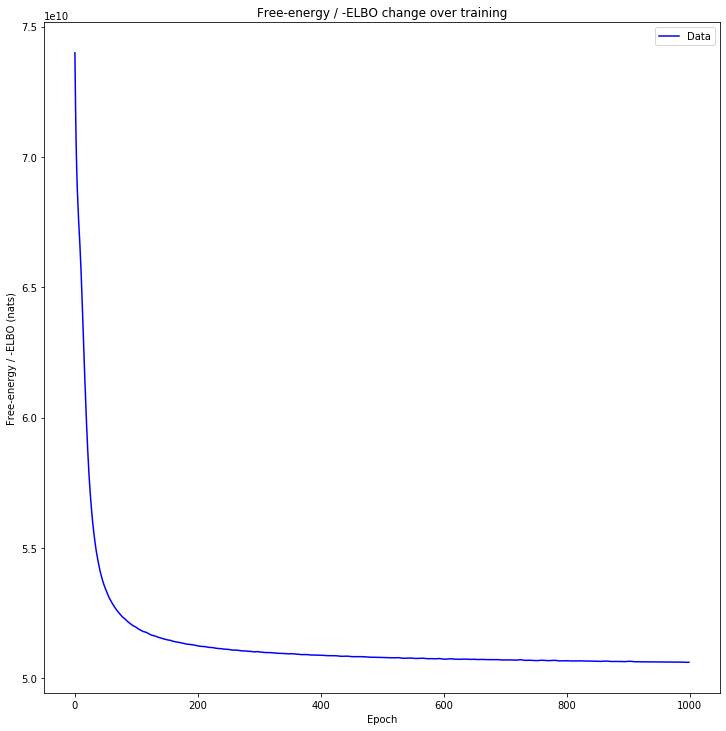

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


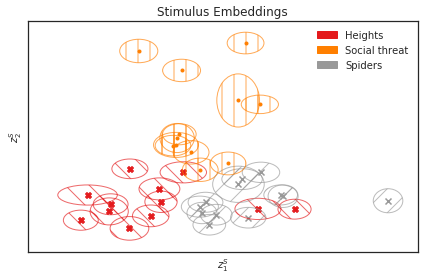

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


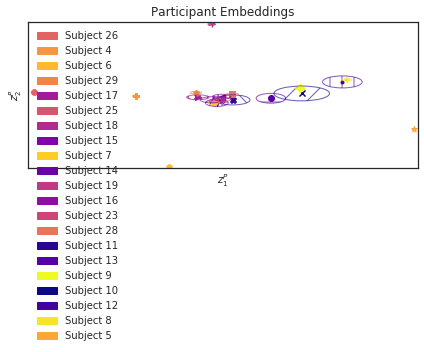

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

05/22/2020 00:38:55 Plotting factors for Participant 8, run 3


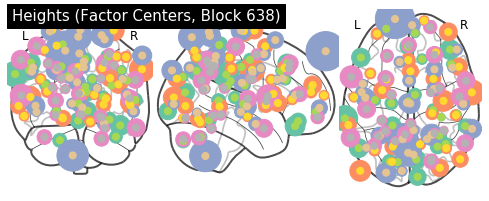

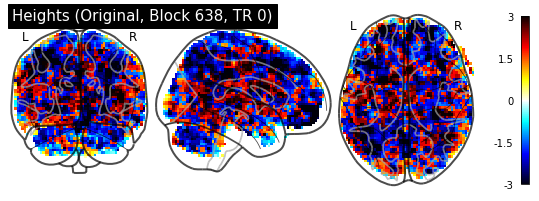

05/22/2020 00:38:59 Reconstruction Error (Frobenius Norm): 1.60327286e+02 out of 1.47722864e+03


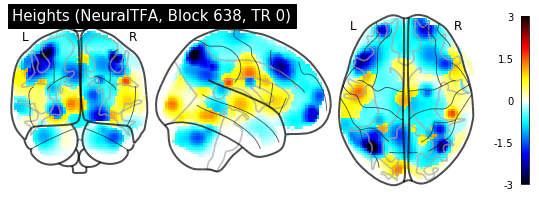

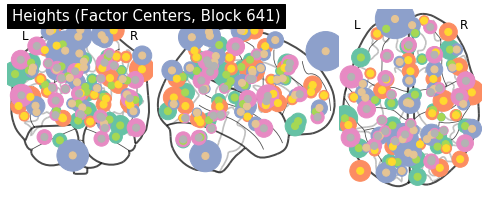

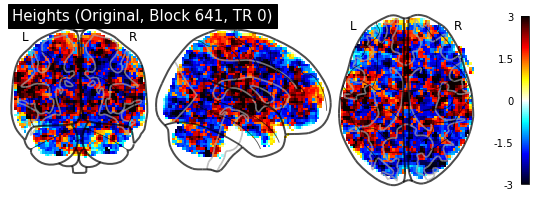

05/22/2020 00:39:03 Reconstruction Error (Frobenius Norm): 1.50833847e+02 out of 1.25074329e+03


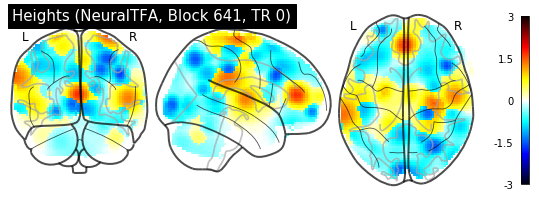

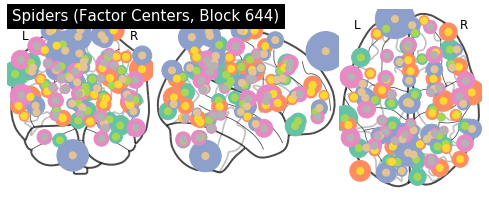

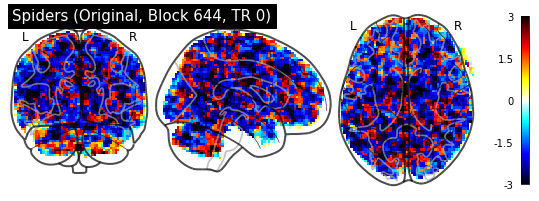

05/22/2020 00:39:08 Reconstruction Error (Frobenius Norm): 1.75193436e+02 out of 1.35838525e+03


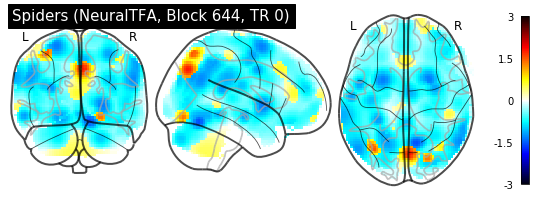

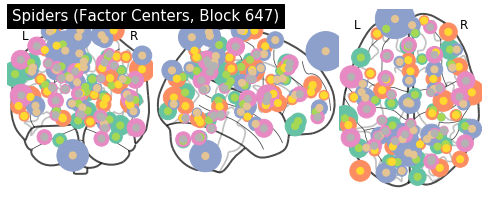

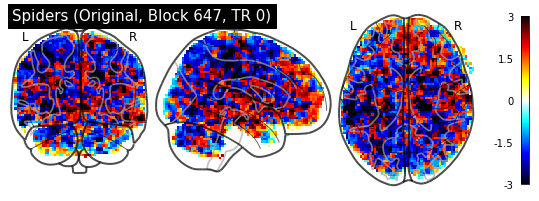

05/22/2020 00:39:13 Reconstruction Error (Frobenius Norm): 1.66908264e+02 out of 1.38033765e+03


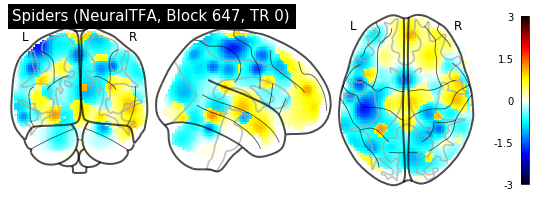

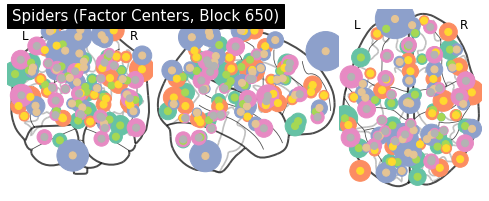

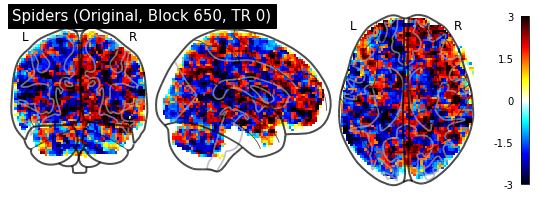

05/22/2020 00:39:17 Reconstruction Error (Frobenius Norm): 1.56894119e+02 out of 1.29299609e+03


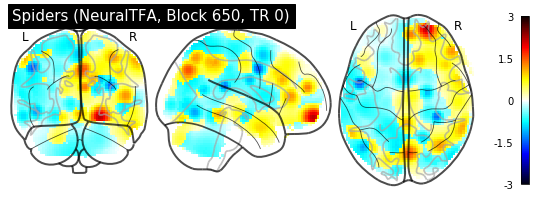

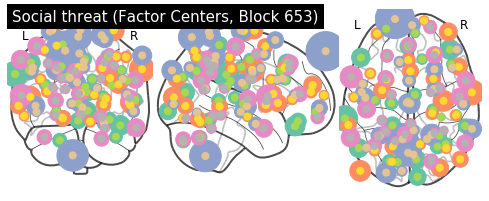

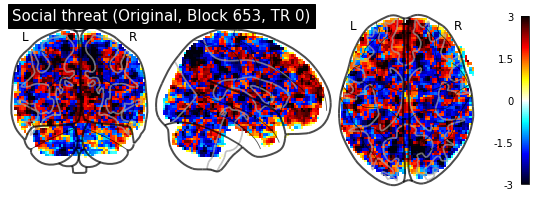

05/22/2020 00:39:22 Reconstruction Error (Frobenius Norm): 1.57459320e+02 out of 1.31358789e+03


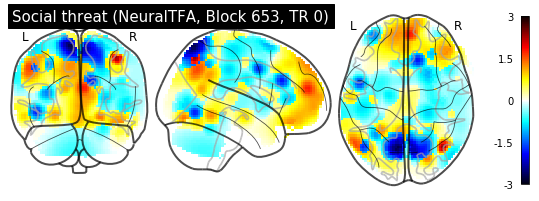

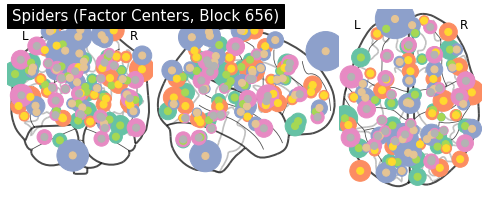

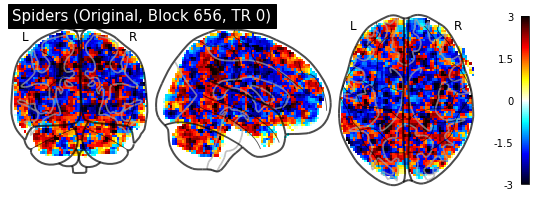

05/22/2020 00:39:26 Reconstruction Error (Frobenius Norm): 1.27263229e+02 out of 1.22551245e+03


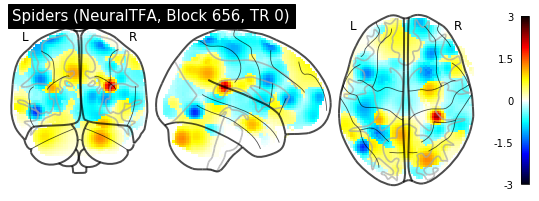

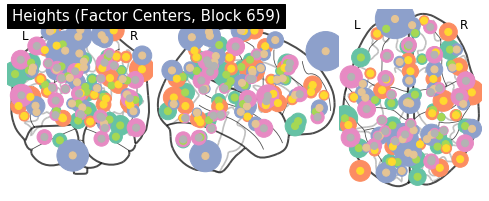

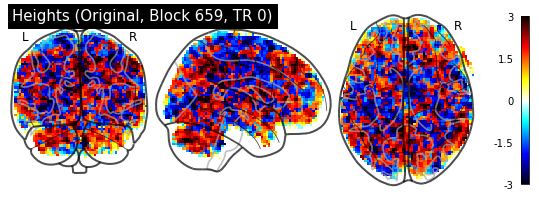

05/22/2020 00:39:31 Reconstruction Error (Frobenius Norm): 1.58742752e+02 out of 1.29824963e+03


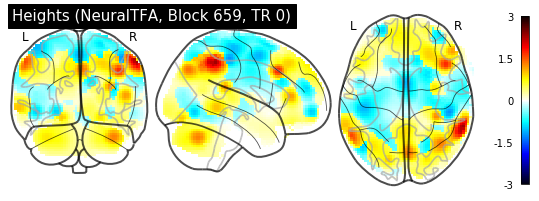

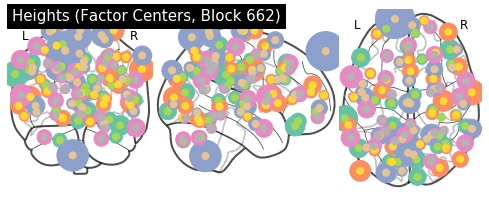

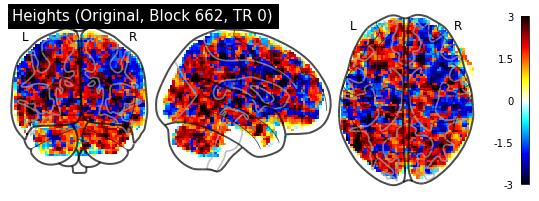

05/22/2020 00:39:36 Reconstruction Error (Frobenius Norm): 1.37824219e+02 out of 1.41164441e+03


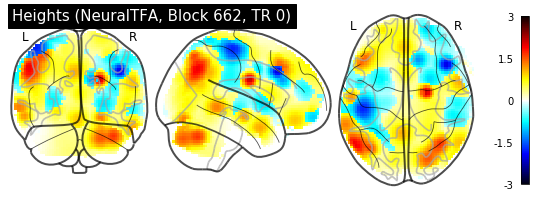

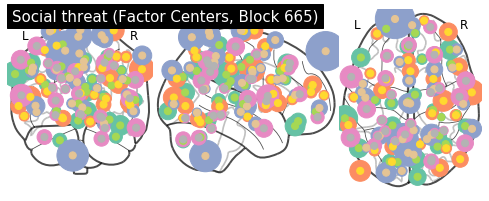

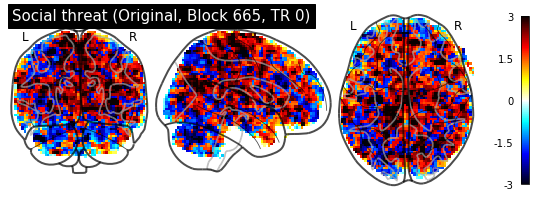

05/22/2020 00:39:40 Reconstruction Error (Frobenius Norm): 1.35153580e+02 out of 1.38056958e+03


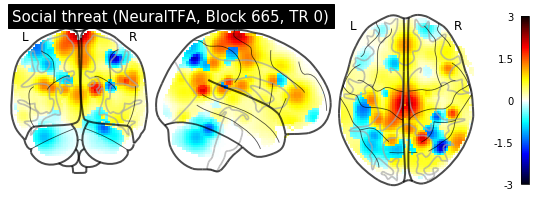

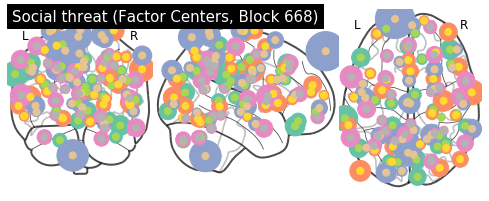

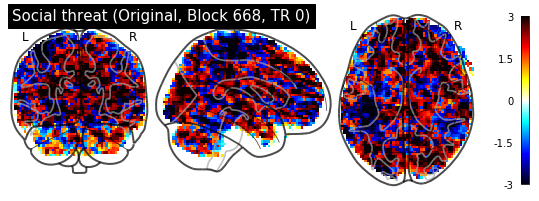

05/22/2020 00:39:45 Reconstruction Error (Frobenius Norm): 1.48321671e+02 out of 1.37014014e+03


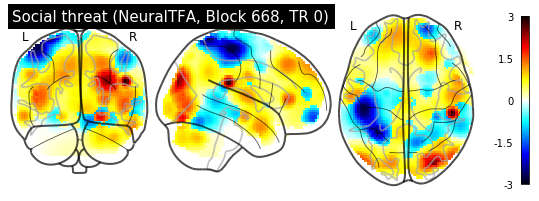

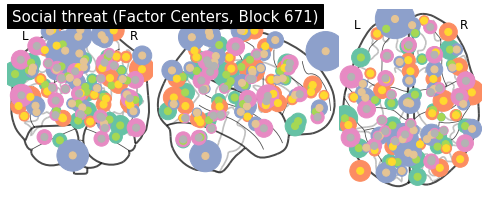

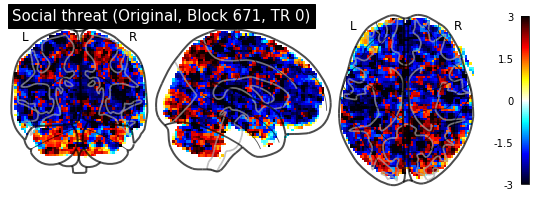

05/22/2020 00:39:49 Reconstruction Error (Frobenius Norm): 2.00884659e+02 out of 1.41309680e+03


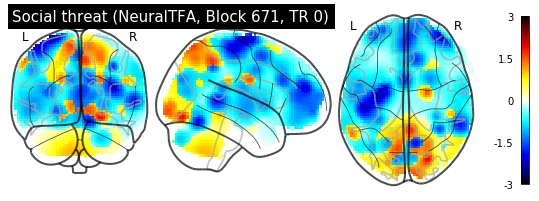

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

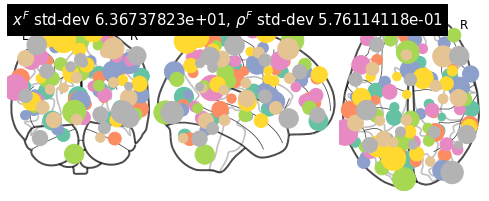

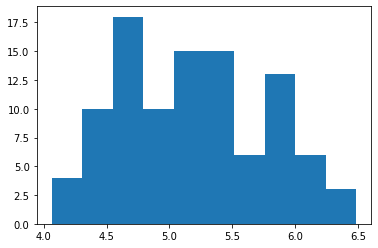

(<nilearn.plotting.displays.OrthoProjector at 0x7f188d2afc10>,
 tensor([[-57.4090, -60.5531,  20.4577],
         [ 42.1920,   9.3978,  -2.6815],
         [ 33.4746, -34.0822,  21.0016],
         [-16.7772, -34.5203,  70.5121],
         [ 10.4857,  23.3555,  36.2654],
         [-17.7354, -79.0522, -30.9443],
         [-29.4958,  61.5144, -15.8115],
         [ -2.1500, -80.0213,   9.7376],
         [-35.7999,  -6.8070,  14.9178],
         [ 64.5233, -25.4662,  30.9146],
         [-16.4375, -23.7025,  40.7878],
         [ 30.5552, -48.3552, -13.1670],
         [ 20.1246, -20.5904,  36.0686],
         [-34.5678,  25.9668,  46.7366],
         [ 26.5753, -50.2871,  68.4036],
         [ 36.4218, -73.9651, -34.7741],
         [ 20.0398,  59.9819,  29.6186],
         [  6.0373, -80.6785,   1.3576],
         [ -2.2265,  53.5281,   4.3494],
         [ -9.8746, -70.3693,  35.0954],
         [ 44.9553,  16.7503,  38.1268],
         [ 62.9596, -41.9484,  -3.6084],
         [ 24.8927, -29.9821,   7.9

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

05/22/2020 00:40:37 Average reconstruction error (MSE): 9.58932031e-01
05/22/2020 00:40:37 Average data norm (Euclidean): 1.09839495e+00
05/22/2020 00:40:37 Percent average reconstruction error: 0.307629


(0.958932031171654, 1.0983949463766804, 0.0030762940441426976)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

05/22/2020 00:41:20 Average reconstruction error (MSE): 1.23320013e+03 +/- 5.54826993e+01
05/22/2020 00:41:20 Average data norm (Euclidean): 1.41168146e+03 +/- 8.14817628e+01
05/22/2020 00:41:20 Percent average reconstruction error: 87.485182 +/- 3.53698431e+00


(array([1253.1842041 , 1181.10949707, 1280.05957031, 1266.20983887,
        1233.42871094, 1289.57202148, 1182.75842285, 1272.46044922,
        1233.85168457, 1210.65588379, 1278.96984863, 1301.72583008,
        1187.19689941, 1241.79638672, 1264.62902832, 1212.69848633,
        1247.6887207 , 1236.81469727, 1249.04431152, 1244.54443359,
        1250.96789551, 1256.1328125 , 1241.88256836, 1250.72619629,
        1245.91235352, 1310.74572754, 1194.06921387, 1309.32873535,
        1296.38330078, 1290.89306641, 1266.0625    , 1236.83911133,
        1209.27160645, 1210.65698242, 1216.64111328, 1249.58508301,
        1207.37561035, 1251.62939453, 1220.1151123 , 1170.79785156,
        1237.18737793, 1341.95227051, 1230.35778809, 1448.98046875,
        1227.10144043, 1327.50476074, 1395.28015137, 1228.94714355,
        1208.38562012, 1152.67211914, 1228.73278809, 1258.4263916 ,
        1236.77868652, 1345.71643066, 1226.42468262, 1294.82678223,
        1241.09472656, 1190.21606445, 1214.89526

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


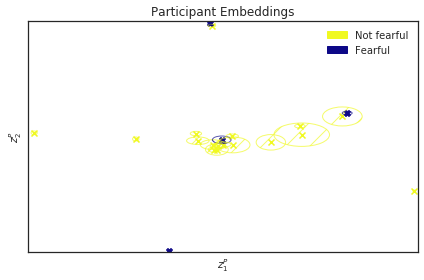

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


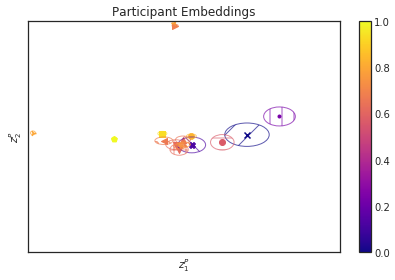

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


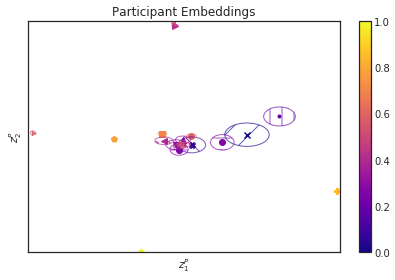

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


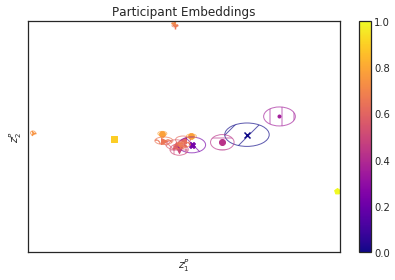

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


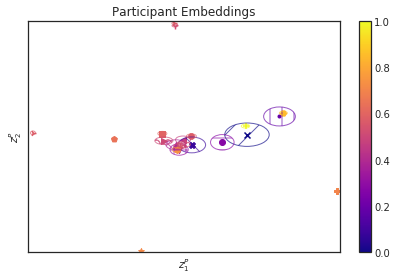

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')